#### DATA PREPROCESSING (LOADING TEXT & CHUNKING)

In [6]:
import shutup
shutup.please()

In [4]:
import os

In [ ]:
from dotenv import load_dotenv
load_dotenv

In [7]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader

In [8]:
from langchain_experimental.text_splitter import SemanticChunker

## Normalize and Remove Accents from text

In [9]:
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [1]:
with open("hackatext.txt", encoding='utf-8') as f:
    data = f.read()
     
print(data)

Μελίτη Μανούκα
Εμπράγματο δίκαιο
(α) κτήση του εμπράγματου δικαιώματος
παράγωγη και πρωτότυπη κτήση
(α) Παράγωγη κτήση είναι αυτή που στηρίζεται σε προϋπάρχον δικαίωμα άλλου
προσώπου. Δηλαδή το δικαίωμα είτε περιέρχεται στον αποκτώντα όπως
βρισκόταν στο άλλο πρόσωπο είτε πηγάζει από το δικαίωμα του άλλου
προσώπου. Η παράγωγη κτήση ονομάζεται και διαδοχή στην οποία αυτός που
αποκτά το δικαίωμα είναι ο διάδοχος ενώ εκείνος από τον οποίο προέρχεται η
κτήση του δικαιώματος είναι ο δικαιοπάροχος.
(β) Πρωτότυπη κτήση είναι αυτή που δεν στηρίζεται σε δικαίωμα, δηλαδή είναι
ανεξάρτητη από δικαίωμα άλλου προσώπου.
Είδη παράγωγης κτήσης
Διακρίνεται σε μεταβιβαστική και δημιουργική. Στη μεταβιβαστική κτήση το
δικαίωμα μεταβαίνει στον νέο δικαιούχου (διάδοχο), όπως ακριβώς υπήρχε στον
δικαιοπάροχο. Αντικαθίσταται απλώς το υποκείμενο του δικαιώματος
(δικαιούχος) χωρίς να μεταβάλλεται ή να αλλοιώνεται το περιεχόμενο του. Στη
δημιουργική κτήση ο μέχρι τώρα δικαιούχος (δικαιοπάροχος) διατηρεί βέβαια τ

In [15]:
data = remove_accents(data)
data = data.lower()

In [16]:
print(data)

μελιτη μανουκα
εμπραγματο δικαιο
(α) κτηση του εμπραγματου δικαιωματος
παραγωγη και πρωτοτυπη κτηση
(α) παραγωγη κτηση ειναι αυτη που στηριζεται σε προυπαρχον δικαιωμα αλλου
προσωπου. δηλαδη το δικαιωμα ειτε περιερχεται στον αποκτωντα οπως
βρισκοταν στο αλλο προσωπο ειτε πηγαζει απο το δικαιωμα του αλλου
προσωπου. η παραγωγη κτηση ονομαζεται και διαδοχη στην οποια αυτος που
αποκτα το δικαιωμα ειναι ο διαδοχος ενω εκεινος απο τον οποιο προερχεται η
κτηση του δικαιωματος ειναι ο δικαιοπαροχος.
(β) πρωτοτυπη κτηση ειναι αυτη που δεν στηριζεται σε δικαιωμα, δηλαδη ειναι
ανεξαρτητη απο δικαιωμα αλλου προσωπου.
ειδη παραγωγης κτησης
διακρινεται σε μεταβιβαστικη και δημιουργικη. στη μεταβιβαστικη κτηση το
δικαιωμα μεταβαινει στον νεο δικαιουχου (διαδοχο), οπως ακριβως υπηρχε στον
δικαιοπαροχο. αντικαθισταται απλως το υποκειμενο του δικαιωματος
(δικαιουχος) χωρις να μεταβαλλεται η να αλλοιωνεται το περιεχομενο του. στη
δημιουργικη κτηση ο μεχρι τωρα δικαιουχος (δικαιοπαροχος) διατηρει βεβαια τ

In [10]:
with open("AstikosKodikas.txt", encoding='utf-8') as f:
    data2 = f.read()
     
print(data2)

ΑΣΤΙΚΟΣ ΚΩΔΙΚΑΣ
ΒΙΒΛΙΟ ΠΡΩΤΟ: ΓΕΝΙΚΕΣ ΑΡΧΕΣ
ΚΕΦΑΛΑΙΟ ΠΡΩΤΟ: ΟΙ ΚΑΝΟΝΕΣ ΤΟΥ ΔΙΚΑΙΟΥ ΓΕΝΙΚΑ
Άρθρο 1 - Πηγές του δικαίου
Οι κανόνες του δικαίου περιλαμβάνονται στους νόμους και στα έθιμα.

Άρθρο 2 - Αναδρομική δύναμη του νόμου
Ο νόμος ορίζει για το μέλλον, δεν έχει αναδρομική δύναμη και διατηρεί την ισχύ του εφόσον άλλος κανόνας
δικαίου δεν τον καταργήσει ρητά ή σιωπηρά.

Άρθρο 3 - Κανόνες δημόσιας τάξης
Η ιδιωτική βούληση δεν μπορεί να αποκλείσει την εφαρμογή κανόνων δημόσιας τάξης.

ΚΕΦΑΛΑΙΟ ΔΕΥΤΕΡΟ: ΙΔΙΩΤΙΚΟ ΔΙΕΘΝΕΣ ΔΙΚΑΙΟ
Άρθρο 4 - Κατάσταση αλλοδαπών
Ο αλλοδαπός απολαμβάνει τα αστικά δικαιώματα του ημεδαπού.

Άρθρο 5 - Ικανότητα δικαίου
Η ικανότητα δικαίου του φυσικού προσώπου ρυθμίζεται από το δίκαιο της ιθαγένειας.

Άρθρο 6 - Αφάνεια
Η αφάνεια διέπεται από το δίκαιο της ιθαγένειας.
Ελληνικό δικαστήριο μπορεί να κηρύξει άφαντο αλλοδαπό, αν πριν από την εξαφάνισή του κατοικούσε ή
διέμενε στην Ελλάδα ή εφόσον έχει περιουσία στην Ελλάδα.

Άρθρο 7 - Ικανότητα για δικαιοπραξία
Η ικανότητ

In [17]:
data2 = remove_accents(data2)
data2 = data2.lower()

In [18]:
print(data2)

αστικος κωδικας
βιβλιο πρωτο: γενικες αρχες
κεφαλαιο πρωτο: οι κανονες του δικαιου γενικα
αρθρο 1 - πηγες του δικαιου
οι κανονες του δικαιου περιλαμβανονται στους νομους και στα εθιμα.

αρθρο 2 - αναδρομικη δυναμη του νομου
ο νομος οριζει για το μελλον, δεν εχει αναδρομικη δυναμη και διατηρει την ισχυ του εφοσον αλλος κανονας
δικαιου δεν τον καταργησει ρητα η σιωπηρα.

αρθρο 3 - κανονες δημοσιας ταξης
η ιδιωτικη βουληση δεν μπορει να αποκλεισει την εφαρμογη κανονων δημοσιας ταξης.

κεφαλαιο δευτερο: ιδιωτικο διεθνες δικαιο
αρθρο 4 - κατασταση αλλοδαπων
ο αλλοδαπος απολαμβανει τα αστικα δικαιωματα του ημεδαπου.

αρθρο 5 - ικανοτητα δικαιου
η ικανοτητα δικαιου του φυσικου προσωπου ρυθμιζεται απο το δικαιο της ιθαγενειας.

αρθρο 6 - αφανεια
η αφανεια διεπεται απο το δικαιο της ιθαγενειας.
ελληνικο δικαστηριο μπορει να κηρυξει αφαντο αλλοδαπο, αν πριν απο την εξαφανιση του κατοικουσε η
διεμενε στην ελλαδα η εφοσον εχει περιουσια στην ελλαδα.

αρθρο 7 - ικανοτητα για δικαιοπραξια
η ικανοτητ

In [ ]:
f = open('norm_hackatext.txt', 'w', encoding="utf-8")
f.write(data)

In [ ]:
f = open('norm_astikoskodikas.txt', 'w', encoding= "utf-8")
f.write(data2)

In [19]:
token_data =data.split()
print(token_data)

['μελιτη', 'μανουκα', 'εμπραγματο', 'δικαιο', '(α)', 'κτηση', 'του', 'εμπραγματου', 'δικαιωματος', 'παραγωγη', 'και', 'πρωτοτυπη', 'κτηση', '(α)', 'παραγωγη', 'κτηση', 'ειναι', 'αυτη', 'που', 'στηριζεται', 'σε', 'προυπαρχον', 'δικαιωμα', 'αλλου', 'προσωπου.', 'δηλαδη', 'το', 'δικαιωμα', 'ειτε', 'περιερχεται', 'στον', 'αποκτωντα', 'οπως', 'βρισκοταν', 'στο', 'αλλο', 'προσωπο', 'ειτε', 'πηγαζει', 'απο', 'το', 'δικαιωμα', 'του', 'αλλου', 'προσωπου.', 'η', 'παραγωγη', 'κτηση', 'ονομαζεται', 'και', 'διαδοχη', 'στην', 'οποια', 'αυτος', 'που', 'αποκτα', 'το', 'δικαιωμα', 'ειναι', 'ο', 'διαδοχος', 'ενω', 'εκεινος', 'απο', 'τον', 'οποιο', 'προερχεται', 'η', 'κτηση', 'του', 'δικαιωματος', 'ειναι', 'ο', 'δικαιοπαροχος.', '(β)', 'πρωτοτυπη', 'κτηση', 'ειναι', 'αυτη', 'που', 'δεν', 'στηριζεται', 'σε', 'δικαιωμα,', 'δηλαδη', 'ειναι', 'ανεξαρτητη', 'απο', 'δικαιωμα', 'αλλου', 'προσωπου.', 'ειδη', 'παραγωγης', 'κτησης', 'διακρινεται', 'σε', 'μεταβιβαστικη', 'και', 'δημιουργικη.', 'στη', 'μεταβιβαστικη

In [21]:
token_data2 =data2.split()
print(token_data2)

['αστικος', 'κωδικας', 'βιβλιο', 'πρωτο:', 'γενικες', 'αρχες', 'κεφαλαιο', 'πρωτο:', 'οι', 'κανονες', 'του', 'δικαιου', 'γενικα', 'αρθρο', '1', '-', 'πηγες', 'του', 'δικαιου', 'οι', 'κανονες', 'του', 'δικαιου', 'περιλαμβανονται', 'στους', 'νομους', 'και', 'στα', 'εθιμα.', 'αρθρο', '2', '-', 'αναδρομικη', 'δυναμη', 'του', 'νομου', 'ο', 'νομος', 'οριζει', 'για', 'το', 'μελλον,', 'δεν', 'εχει', 'αναδρομικη', 'δυναμη', 'και', 'διατηρει', 'την', 'ισχυ', 'του', 'εφοσον', 'αλλος', 'κανονας', 'δικαιου', 'δεν', 'τον', 'καταργησει', 'ρητα', 'η', 'σιωπηρα.', 'αρθρο', '3', '-', 'κανονες', 'δημοσιας', 'ταξης', 'η', 'ιδιωτικη', 'βουληση', 'δεν', 'μπορει', 'να', 'αποκλεισει', 'την', 'εφαρμογη', 'κανονων', 'δημοσιας', 'ταξης.', 'κεφαλαιο', 'δευτερο:', 'ιδιωτικο', 'διεθνες', 'δικαιο', 'αρθρο', '4', '-', 'κατασταση', 'αλλοδαπων', 'ο', 'αλλοδαπος', 'απολαμβανει', 'τα', 'αστικα', 'δικαιωματα', 'του', 'ημεδαπου.', 'αρθρο', '5', '-', 'ικανοτητα', 'δικαιου', 'η', 'ικανοτητα', 'δικαιου', 'του', 'φυσικου', 'πρ

### Use normalized texts

In [22]:
with open("norm_astikoskodikas.txt", encoding='utf-8') as f:
    data2 = f.read()

In [23]:
with open("norm_hackatext.txt", encoding='utf-8') as f:
    data = f.read()

## Load Data via TextLoader


In [25]:
loader = TextLoader(file_path=r"C:\Users\mmpri\OneDrive\Desktop\Langchain Test\norm_hackatext.txt", encoding='utf-8')

In [26]:
data = loader.load()

In [27]:
print (f'You have {len(data)} document(s) in your data')
print (f'There are {len(data[0].page_content)} characters in your sample document')
print (f'Here is a sample: {data[0].page_content[:1000]}')

You have 1 document(s) in your data
There are 375216 characters in your sample document
Here is a sample: 
εμπραγματο δικαιο
(α) κτηση του εμπραγματου δικαιωματος
παραγωγη και πρωτοτυπη κτηση
(α) παραγωγη κτηση ειναι αυτη που στηριζεται σε προυπαρχον δικαιωμα αλλου
προσωπου. δηλαδη το δικαιωμα ειτε περιερχεται στον αποκτωντα οπως
βρισκοταν στο αλλο προσωπο ειτε πηγαζει απο το δικαιωμα του αλλου
προσωπου. η παραγωγη κτηση ονομαζεται και διαδοχη στην οποια αυτος που
αποκτα το δικαιωμα ειναι ο διαδοχος ενω εκεινος απο τον οποιο προερχεται η
κτηση του δικαιωματος ειναι ο δικαιοπαροχος.
(β) πρωτοτυπη κτηση ειναι αυτη που δεν στηριζεται σε δικαιωμα, δηλαδη ειναι
ανεξαρτητη απο δικαιωμα αλλου προσωπου.
ειδη παραγωγης κτησης
διακρινεται σε μεταβιβαστικη και δημιουργικη. στη μεταβιβαστικη κτηση το
δικαιωμα μεταβαινει στον νεο δικαιουχου (διαδοχο), οπως ακριβως υπηρχε στον
δικαιοπαροχο. αντικαθισταται απλως το υποκειμενο του δικαιωματος
(δικαιουχος) χωρις να μεταβαλλεται η να αλλοιωνεται το περι

In [30]:
loader2 = TextLoader(file_path=r"C:\Users\mmpri\OneDrive\Desktop\Langchain Test\norm_astikoskodikas.txt", encoding='utf-8')

In [31]:
data2 = loader2.load()

### Split documents to chunks before embedding

In [33]:

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=10)
texts = text_splitter.split_documents(data)
texts2 = text_splitter.split_documents(data2)

In [34]:
print (f'Now you have {len(texts)} + {len(texts2)} documents')

Now you have 430 + 134 documents


## Compute token count using OpenAI tokenizer

In [35]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

def tiktoken_len(text):
    tokens = tokenizer.encode(text, disallowed_special=())
    return len(tokens)

In [36]:
tiktoken_len(data[0].page_content)


318160

In [37]:
tiktoken_len(data2[0].page_content)

90702

In [38]:
tiktoken.encoding_for_model('gpt-4')

<Encoding 'cl100k_base'>

In [39]:
token_counts = [tiktoken_len(doc.page_content) for doc in texts]


In [40]:
token_counts2 = [tiktoken_len(doc.page_content) for doc in texts2]

In [41]:
print(f"""Min: {min(token_counts2)}
Avg: {int(sum(token_counts2) / len(token_counts2))}
Max: {max(token_counts2)}""")

Min: 122
Avg: 676
Max: 853


In [42]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 57
Avg: 739
Max: 864


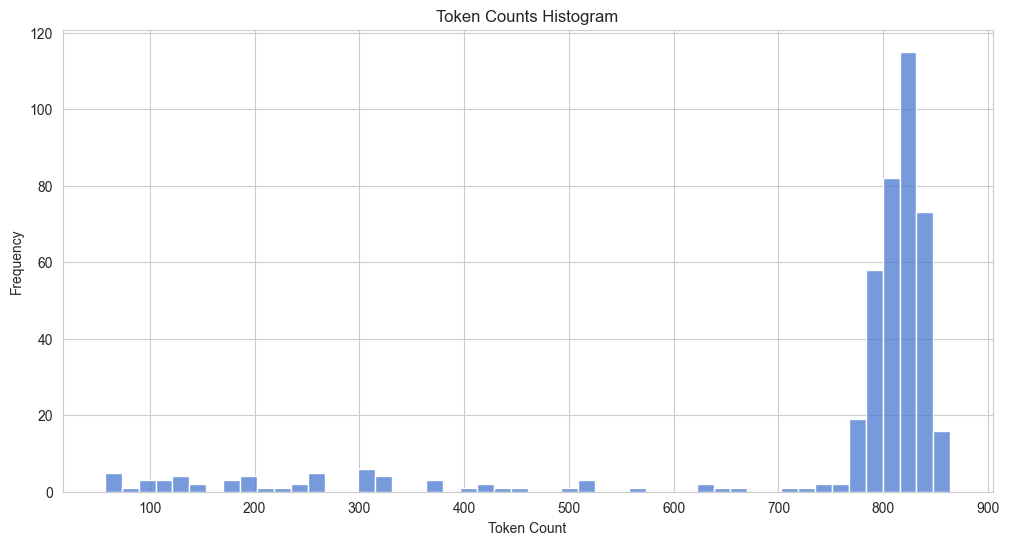

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

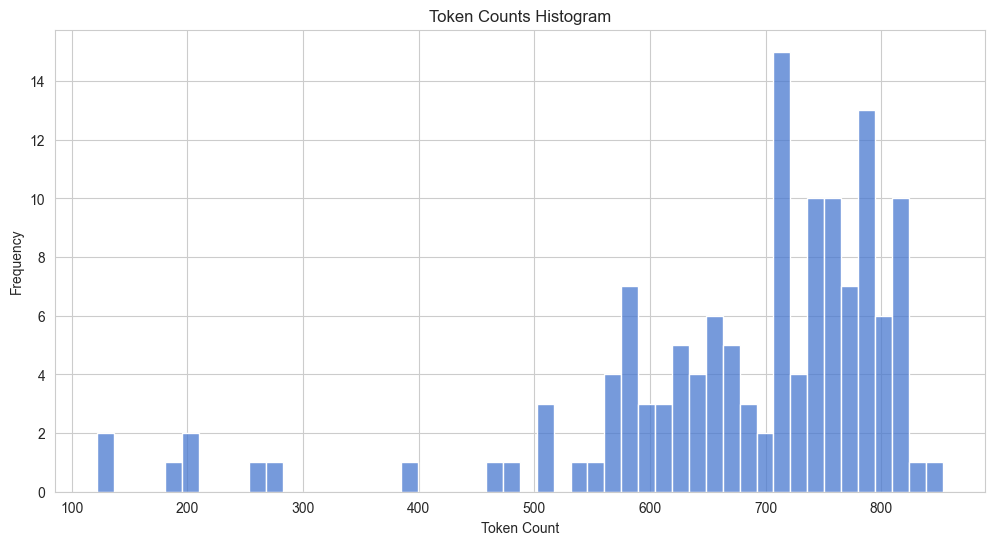

In [44]:
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts2, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

## Embed text using OpenAI Embeddings and FAISS



In [45]:

from langchain.embeddings.openai import OpenAIEmbeddings

In [46]:
embedding = OpenAIEmbeddings()


### Create vectorstore with Faiss from texts (Faiss & OpenAI Embeddings)

In [47]:

from langchain.vectorstores import FAISS


db = FAISS.from_documents(texts, embedding)

In [48]:
db2 = FAISS.from_documents(texts2, embedding)

In [49]:
db.merge_from(db2)

#### Create Querry and Select document chunks based on similarity from vectorstore

In [50]:
query = ' Ποιες διατάξεις του αστικού κώδικα της Ελλάδος αφορούν το παρακάτω: Ο επιειρηματίας Α για να επεκτείνει τις εγκαταστασεις του εργοστασίου του, έχτισε συνεχόμενα με το παλαιό κτίριο μια νέα. πτέρυγα. Μετά την αποπεράτωση της οικοδομής διαπιστώθηκε όμως ότι το μικρό τμημα του ακινήτου, στο οποίο αυτό ανεγέρθηκε, δεν ανήκε στον Α αλλά στον γείτονα Β, πραγμα που ο Β δεν γνώριζε ούτε όφειλε να γνωρίζει. Ποια ειναι η τύχη της κυριότητας στο τμήμα του εδάφους που ανήκε στον Β και καταλήφθηκε από την οικοδομή;'
docs = db.similarity_search(query)

In [51]:
len(docs)

4

In [52]:
print(docs[0].page_content)
print(docs[1].page_content)
print(docs[2].page_content)
print(docs[3].page_content)


σε διαλυση ενος οικονομικου αγαθου, του οποιου η διατηρηση επιβαλλεται για
λογους γενικοτερου κοινωνικου συμφεροντος. δικαιωμα διαμαρτυριας εχει μονον
ο κυριος του εδαφους, πανω στο οποιο εγινε η επεκταση η εκεινος που εχει σε αυτο
εμπραγματο δικαιωμα (ακ 1011).
συνεπειες
εαν συντρεχουν ολες οι παραπανω προυποθεσεις, το δικαστηριο μπορει κατ’
ευλογη κριση να επιδικασει την κυριοτητα του εδαφους στον οικοδομησαντα.
αυτος με τη σειρα του ειναι υποχρεωμενος (α) να καταβαλει σε χρημα την αξια
που αυτο ειχε κατα τον χρονο της καταληψης, (β) να αποκαταστησει καθε αλλη
ζημια και ειδικα αυτη που προερχεται απο τη μειωση της αξιας του απομενοντος
οικοπεδου. παντως η επιδικαση δεν ειναι υποχρεωτικη ακομη και εαν συντρεχουν
ολες οι προυποθεσεις της ακ 1010.
32προυποθεσεις
το δικαστηριο μπορει κατ’ ευλογη κριση να επιδικασει στον οικοδομησαντα την
κυριοτητα του εδαφους που κατελαβε, εαν συντρεχουν οι εξης προυποθεσεις: (α)
ανεγερση οικοδομης, (β) απο τον κυριο, (γ) επεκταση της οικοδομης στο γειτο

In [53]:
for doc in docs:
    print (f"{doc.page_content}\n")

σε διαλυση ενος οικονομικου αγαθου, του οποιου η διατηρηση επιβαλλεται για
λογους γενικοτερου κοινωνικου συμφεροντος. δικαιωμα διαμαρτυριας εχει μονον
ο κυριος του εδαφους, πανω στο οποιο εγινε η επεκταση η εκεινος που εχει σε αυτο
εμπραγματο δικαιωμα (ακ 1011).
συνεπειες
εαν συντρεχουν ολες οι παραπανω προυποθεσεις, το δικαστηριο μπορει κατ’
ευλογη κριση να επιδικασει την κυριοτητα του εδαφους στον οικοδομησαντα.
αυτος με τη σειρα του ειναι υποχρεωμενος (α) να καταβαλει σε χρημα την αξια
που αυτο ειχε κατα τον χρονο της καταληψης, (β) να αποκαταστησει καθε αλλη
ζημια και ειδικα αυτη που προερχεται απο τη μειωση της αξιας του απομενοντος
οικοπεδου. παντως η επιδικαση δεν ειναι υποχρεωτικη ακομη και εαν συντρεχουν
ολες οι προυποθεσεις της ακ 1010.

32προυποθεσεις
το δικαστηριο μπορει κατ’ ευλογη κριση να επιδικασει στον οικοδομησαντα την
κυριοτητα του εδαφους που κατελαβε, εαν συντρεχουν οι εξης προυποθεσεις: (α)
ανεγερση οικοδομης, (β) απο τον κυριο, (γ) επεκταση της οικοδομης στο γειτ

## Try larger density for better context and create base retriever

In [54]:
retriever = db.as_retriever(search_kwargs={"k": 7})
rtexts = retriever.get_relevant_documents(query)

#### With bigger density (k) and using mmr instead of simple similarity search we also get context from a wider variety, including articles of the legal code, which will contribute to a more relevant answer

In [55]:
for text in rtexts:
    print (f"{text.page_content}\n")

σε διαλυση ενος οικονομικου αγαθου, του οποιου η διατηρηση επιβαλλεται για
λογους γενικοτερου κοινωνικου συμφεροντος. δικαιωμα διαμαρτυριας εχει μονον
ο κυριος του εδαφους, πανω στο οποιο εγινε η επεκταση η εκεινος που εχει σε αυτο
εμπραγματο δικαιωμα (ακ 1011).
συνεπειες
εαν συντρεχουν ολες οι παραπανω προυποθεσεις, το δικαστηριο μπορει κατ’
ευλογη κριση να επιδικασει την κυριοτητα του εδαφους στον οικοδομησαντα.
αυτος με τη σειρα του ειναι υποχρεωμενος (α) να καταβαλει σε χρημα την αξια
που αυτο ειχε κατα τον χρονο της καταληψης, (β) να αποκαταστησει καθε αλλη
ζημια και ειδικα αυτη που προερχεται απο τη μειωση της αξιας του απομενοντος
οικοπεδου. παντως η επιδικαση δεν ειναι υποχρεωτικη ακομη και εαν συντρεχουν
ολες οι προυποθεσεις της ακ 1010.

32προυποθεσεις
το δικαστηριο μπορει κατ’ ευλογη κριση να επιδικασει στον οικοδομησαντα την
κυριοτητα του εδαφους που κατελαβε, εαν συντρεχουν οι εξης προυποθεσεις: (α)
ανεγερση οικοδομης, (β) απο τον κυριο, (γ) επεκταση της οικοδομης στο γειτ

In [56]:
docs_and_scores = db.similarity_search_with_score(query)

In [57]:
print(docs_and_scores)

[(Document(page_content='σε διαλυση ενος οικονομικου αγαθου, του οποιου η διατηρηση επιβαλλεται για\nλογους γενικοτερου κοινωνικου συμφεροντος. δικαιωμα διαμαρτυριας εχει μονον\nο κυριος του εδαφους, πανω στο οποιο εγινε η επεκταση η εκεινος που εχει σε αυτο\nεμπραγματο δικαιωμα (ακ 1011).\nσυνεπειες\nεαν συντρεχουν ολες οι παραπανω προυποθεσεις, το δικαστηριο μπορει κατ’\nευλογη κριση να επιδικασει την κυριοτητα του εδαφους στον οικοδομησαντα.\nαυτος με τη σειρα του ειναι υποχρεωμενος (α) να καταβαλει σε χρημα την αξια\nπου αυτο ειχε κατα τον χρονο της καταληψης, (β) να αποκαταστησει καθε αλλη\nζημια και ειδικα αυτη που προερχεται απο τη μειωση της αξιας του απομενοντος\nοικοπεδου. παντως η επιδικαση δεν ειναι υποχρεωτικη ακομη και εαν συντρεχουν\nολες οι προυποθεσεις της ακ 1010.', metadata={'source': 'C:\\Users\\mmpri\\OneDrive\\Desktop\\Langchain Test\\norm_hackatext.txt'}), 0.23164244), (Document(page_content='32προυποθεσεις\nτο δικαστηριο μπορει κατ’ ευλογη κριση να επιδικασει στ

### Engineer Prompt to give clear instructions to the llm and avoid hallucinations and better structure

In [58]:
from langchain import PromptTemplate

In [59]:
prompt_template = """""Θα σου δώσω συγκεκριμένες πληροφορίες [ΠΛΗΡΟΦΟΡΙΕΣ] και μια 
                        ερώτηση [ΕΡΩΤΗΣΗ]. Βάσει αυτών, θέλω μια αναλυτική και ακριβή απάντηση [ΑΠΑΝΤΗΣΗ]. Εάν δεν διαθέτεις 
                        αρκετές πληροφορίες για μια συγκεκριμένη απάντηση, χρησιμοποίησε τη φράση: 'Δυστυχώς δεν έχω τις απαραίτητες 
                        πληροφορίες για να σου προσφέρω μια αξιόπιστη απάντηση. ' 
                        ΠΛΗΡΟΦΟΡΙΕΣ: \n{context}\n
                        ΕΡΩΤΗΣΗ: \n{question}\n
                        ΑΠΑΝΤΗΣΗ:"
                        """

prompt = PromptTemplate(template=prompt_template, input_variables=["context", "question"])


### LLM Chain using retrieved Documents

In [69]:

from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA

llm = ChatOpenAI(temperature=0.1, model='gpt-4')
chain = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever,chain_type_kwargs={"prompt" : prompt, "verbose": True}) 


result = chain.run(query)
print(result)






> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
""Θα σου δώσω συγκεκριμένες πληροφορίες [ΠΛΗΡΟΦΟΡΙΕΣ] και μια 
                        ερώτηση [ΕΡΩΤΗΣΗ]. Βάσει αυτών, θέλω μια αναλυτική και ακριβή απάντηση [ΑΠΑΝΤΗΣΗ]. Εάν δεν διαθέτεις 
                        αρκετές πληροφορίες για μια συγκεκριμένη απάντηση, χρησιμοποίησε τη φράση: 'Δυστυχώς δεν έχω τις απαραίτητες 
                        πληροφορίες για να σου προσφέρω μια αξιόπιστη απάντηση. ' 
                        ΠΛΗΡΟΦΟΡΙΕΣ: 
σε διαλυση ενος οικονομικου αγαθου, του οποιου η διατηρηση επιβαλλεται για
λογους γενικοτερου κοινωνικου συμφεροντος. δικαιωμα διαμαρτυριας εχει μονον
ο κυριος του εδαφους, πανω στο οποιο εγινε η επεκταση η εκεινος που εχει σε αυτο
εμπραγματο δικαιωμα (ακ 1011).
συνεπειες
εαν συντρεχουν ολες οι παραπανω προυποθεσεις, το δικαστηριο μπορει κατ’
ευλογη κριση να επιδικασει την κυριοτητα του εδαφους στον οικοδομησαντα.
αυτος με τη σειρα του ειναι υποχ

### Using different retrievers

### Multiquerry

In [ ]:
from langchain import PromptTemplate

In [43]:
from typing import List
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain.chains import LLMChain
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate
from pydantic import BaseModel, Field


# Output parser will split the LLM result into a list of queries
class LineList(BaseModel):
    # "lines" is the key (attribute name) of the parsed output
    lines: List[str] = Field(description="Lines of text")


class LineListOutputParser(PydanticOutputParser):
    def __init__(self) -> None:
        super().__init__(pydantic_object=LineList)

    def parse(self, text: str) -> LineList:
        lines = text.strip().split("\n")
        return LineList(lines=lines)


output_parser = LineListOutputParser()

QUERY_PROMPT = PromptTemplate(
    input_variables=["question"],
    template="""You are an AI language model assistant. Your task is to generate five 
    different versions of the given user question to retrieve relevant documents from a vector 
    database. By generating multiple perspectives on the user question, your goal is to help
    the user overcome some of the limitations of the distance-based similarity search. 
    Provide these alternative questions separated by newlines.
    Original question: {question}""",
)
llm = ChatOpenAI(temperature=0, model = "gpt-4")

# Chain
llm_chain = LLMChain(llm=llm, prompt=QUERY_PROMPT, output_parser=output_parser)

# Other inputs
question = query

# Run
retriever = MultiQueryRetriever(
    retriever=db.as_retriever(), llm_chain=llm_chain, parser_key="lines"
)  # "lines" is the key (attribute name) of the parsed output

# Results
unique_docs = retriever.get_relevant_documents(
    query="What does the course say about regression?"
)
len(unique_docs)



ValidationError: 1 validation error for LineListOutputParser
pydantic_object
  subclass of BaseModel expected (type=type_error.subclass; expected_class=BaseModel)

### Contextual Compression (compress retrieved docs based on context)

In [64]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor


llm = OpenAI(temperature=0)
compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

compressed_docs = compression_retriever.get_relevant_documents(query)
print(compressed_docs)

[Document(page_content='Ποιες διατάξεις του αστικού κώδικα της Ελλάδος αφορούν το παρακάτω: Ο επιειρηματίας Α για να επεκτείνει τις εγκαταστασεις του εργοστασίου του, έχτισε συνεχόμενα με το παλαιό κτίριο μια νέα. πτέρυγα. Μετά την αποπεράτωση της οικοδομής διαπιστώθηκε όμως ότι το μικρό τμημα του ακινήτου, στο οπ', metadata={'source': 'C:\\Users\\mmpri\\OneDrive\\Desktop\\Langchain Test\\norm_hackatext.txt'}), Document(page_content='το δικαστηριο μπορει κατ’ ευλογη κριση να επιδικασει στον οικοδομησαντα την\nκυριοτητα του εδαφους που κατελαβε, εαν συντρεχουν οι εξης προυποθεσεις: (α)\nανεγειρση οικοδομης, (β) απο τον κυριο, (γ) επεκταση της οικοδομης στο γειτονικο\nακινητο, (δ) καλη πιστη του οικοδομησαντος, (ε) ελλειψη εγκαι', metadata={'source': 'C:\\Users\\mmpri\\OneDrive\\Desktop\\Langchain Test\\norm_hackatext.txt'}), Document(page_content='επιδικασει στον οικοδομησαντα την κυριοτητα του καταληφθεντος τμηματος του\nγειτονικου γηπεδου. εαν οι προυποθεσεις αυτες λειπουν η ακ 1010 δ

In [68]:
from langchain.chains import RetrievalQA
from langchain.chains.question_answering import load_qa_chain
llm = ChatOpenAI(temperature=0)
chain = load_qa_chain(llm, chain_type="stuff")




chain.run(input_documents=compressed_docs, question=query,chain_type_kwargs={"prompt" : prompt, "verbose": True} )

"Η κατάσταση που περιγράφετε αναφέρεται στον Άρθρο 1010 του Αστικού Κώδικα της Ελλάδος. Σύμφωνα με αυτό, το δικαστήριο μπορεί, κατ' ευλογη κρίση, να επιδικάσει στον οικοδόμο την κυριότητα του τμήματος του γειτονικού ακινήτου που κατέλαβε, εάν συντρέχουν συγκεκριμένες προϋποθέσεις. Ωστόσο, αν αυτές οι προϋποθέσεις δεν ικανοποιούνται, τότε ο γείτονας Β αποκτά την κυριότητα του τμήματος της οικοδομής που βρίσκεται στο έδαφός του."